# 加载模型 识别图像

In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from PIL import Image
import time
import matplotlib.pyplot as plt
%matplotlib inline

输出函数

In [3]:
def printChess(chess):
    print("  ",end="")
    for i in range(15):
        print("%3d" %(i), end="")
    print("")

    for i in range(15):
        print("%2d" %(i), end="")
        for j in range(15):
            if chess[i, j] == 0:
                print("  *", end="")
            elif chess[i, j] == 1:
                print("  o", end="")
            else:
                print("  -", end="")
        print("")

模型路径

In [4]:
model_path = "./net_2.0"

定义执行器    加载图

In [5]:
place = "CPU"
if place == "GPU":
    print("GPU")
    gpu_options = tf.GPUOptions(allow_growth=True)
    gpu_options =tf.GPUOptions(per_process_gpu_memory_fraction=0.8,allow_growth=True) ##每个gpu占用0.8																				的显存
    config=tf.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True,log_device_placement=False)
    sess=tf.Session(config=config)##如果电脑有多个GPU，tensorflow默认全部使用。如果想只使用部分GPU，可以设置CUDA_VISIBLE_DEVICES。
else:
    sess = tf.Session()
saver =tf.train.import_meta_graph(model_path + '/conv_ver_1.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint(model_path))

INFO:tensorflow:Restoring parameters from ./net_2.0\conv_ver_1.ckpt


In [6]:
graph = tf.get_default_graph()
#tensor_name_list = [tensor.name for tensor in graph.as_graph_def().node]
# print(tensor_name_list)

In [7]:
#输入占位符
xs = graph.get_tensor_by_name('xs:0')
ys = graph.get_tensor_by_name('ys:0')
keep_prob = graph.get_tensor_by_name('keep_prob:0')
#预测结果
y = graph.get_tensor_by_name('y:0')

time =  0.00498652458190918
FPS =  200.5404733444896


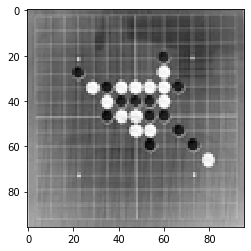

In [29]:
#加载图片，图像预处理为灰度图片
img = Image.open("./img/5.png").convert('L').resize((96, 96), Image.ANTIALIAS)
# 处理为np矩阵
img = np.asfarray((np.array(img)/255.0*0.99+0.01).reshape(1,96*96))

time_start = time.time()
infer_y = sess.run(y,feed_dict={xs:img,keep_prob:1.0})
time_end = time.time()

print("time = ",time_end-time_start)
print("FPS = ",1.0/(time_end-time_start))
plt.imshow(img.reshape(96,96),cmap='Greys',interpolation='None')

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 0  *  -  -  -  -  -  -  -  -  -  o  o  -  -  -
 1  -  -  -  -  o  o  o  o  o  o  o  o  o  o  -
 2  -  -  -  -  o  o  -  -  o  o  o  o  o  -  -
 3  -  -  -  -  -  o  o  -  -  o  o  o  o  -  -
 4  -  -  -  o  o  o  -  *  -  *  o  o  o  -  -
 5  -  -  -  -  *  o  *  *  *  *  o  -  -  -  -
 6  -  -  -  -  -  *  o  o  o  *  -  -  -  -  -
 7  -  -  -  -  -  o  *  *  o  o  -  -  -  -  -
 8  -  -  -  -  -  -  o  *  *  -  o  o  -  -  -
 9  -  -  -  o  -  o  o  o  o  -  -  o  -  -  -
10  -  -  -  -  -  -  -  -  o  -  -  -  *  -  -
11  -  -  -  -  -  -  o  -  -  o  -  -  -  -  -
12  -  -  -  -  -  -  -  -  -  -  -  -  -  -  *
13  -  -  -  -  -  -  -  -  -  -  -  -  -  -  *
14  *  *  *  -  -  -  -  -  -  -  -  *  -  *  *


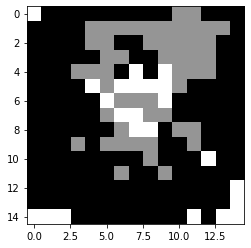

In [30]:
plt.imshow(np.argmax(infer_y[0],1).reshape(15,15),cmap='Greys',interpolation='None')
#输出棋盘
printChess(np.argmax(infer_y[0],1).reshape(15,15))